<a href="https://colab.research.google.com/github/NeoZ666/classroom_DL_EXP/blob/main/DL_exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0/10
Loss: 0.288005
Gradients (Output Weights): 
[[-3.76432848]
 [-5.4103428 ]
 [-7.99084888]
 [-5.45125418]
 [-9.81989945]
 [-5.31824254]
 [-8.20044844]
 [-4.75365876]]
Gradients (Output Bias): 
[[-19.53987158]]
Gradients (Hidden Weights): 
[[0.07512661 0.67904583 0.60100211 0.14860584 1.49378575 0.35247884
  1.04420582 0.63379664]
 [0.13916951 1.16276271 0.96199666 0.24247901 2.3691928  0.43959098
  1.7034199  0.93276094]
 [0.03087856 0.26374242 0.56880027 0.12506432 0.88304241 0.04189161
  0.88470687 0.12902578]
 [0.01395669 0.36934103 0.53129608 0.13964233 1.16995143 0.15168666
  0.83597805 0.41952521]
 [0.0569656  0.59412456 0.558835   0.13910605 1.35436276 0.24938163
  0.89527226 0.53208175]
 [0.07034321 0.87735986 0.96223807 0.20370572 2.28969571 0.43111336
  1.51842572 0.92170929]
 [0.04598716 0.50978284 0.38796327 0.07440284 0.95276096 0.17612573
  0.66356507 0.46265638]
 [0.10103777 1.00423793 0.78429445 0.1775357  1.87997537 0.40650845
  1.36710965 0.79432348]]
Gradien

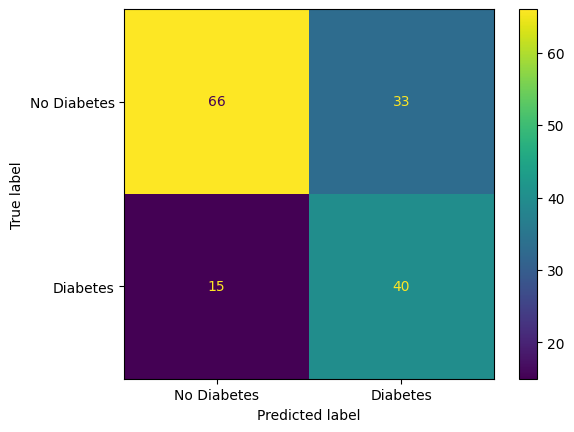

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Split the dataset into inputs and outputs
inputs = data.iloc[:, :-1].values
outputs = data.iloc[:, -1].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Seed random numbers to make the calculation deterministic (just for reproducibility)
np.random.seed(1)

# Initialize weights with random values
input_layer_neurons = X_train.shape[1]  # Number of features in input data
hidden_layer_neurons = 8  # Number of hidden layer neurons
output_neurons = 1  # Number of neurons in output layer

# Weight initialization
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

# Learning rate
lr = 0.1

# Training the neural network
epochs = 10
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_activation = np.dot(X_train, hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    # Compute the error (loss)
    error = y_train - predicted_output
    loss = np.mean(np.square(error)) / 2  # Mean Squared Error

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Gradients
    gradient_output_weights = hidden_layer_output.T.dot(d_predicted_output)
    gradient_output_bias = np.sum(d_predicted_output, axis=0, keepdims=True)
    gradient_hidden_weights = X_train.T.dot(d_hidden_layer)
    gradient_hidden_bias = np.sum(d_hidden_layer, axis=0, keepdims=True)

    # Updating Weights and Biases
    output_weights += gradient_output_weights * lr
    output_bias += gradient_output_bias * lr
    hidden_weights += gradient_hidden_weights * lr
    hidden_bias += gradient_hidden_bias * lr

    # Print gradients and loss
    if epoch % 1000 == 0:  # Print every 1000 epochs
        print(f"Epoch {epoch}/{epochs}")
        print(f"Loss: {loss:.6f}")
        print(f"Gradients (Output Weights): \n{gradient_output_weights}")
        print(f"Gradients (Output Bias): \n{gradient_output_bias}")
        print(f"Gradients (Hidden Weights): \n{gradient_hidden_weights}")
        print(f"Gradients (Hidden Bias): \n{gradient_hidden_bias}\n")

# Test the neural network
hidden_layer_activation = np.dot(X_test, hidden_weights)
hidden_layer_activation += hidden_bias
hidden_layer_output = sigmoid(hidden_layer_activation)

output_layer_activation = np.dot(hidden_layer_output, output_weights)
output_layer_activation += output_bias
predicted_output = sigmoid(output_layer_activation)

# Convert predictions to binary outcomes
predicted_output = (predicted_output > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_output == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_output)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.show()


Epoch 1/100
Loss: 0.254897
Gradients (Output Weights): 
[[-15.90231357]
 [-10.9251167 ]
 [-18.83989805]
 [-12.27211   ]]
Gradients (Output Bias): 
[[-33.37353158]]
Gradients (Hidden Weights): 
[[ 1.35392765  0.93689748  0.04340045  1.18763182]
 [ 2.03353837  1.51862064  0.06769216  1.70964059]
 [ 0.51011457  0.21433977  0.02468967 -0.00218319]
 [ 0.89852378  0.29347399  0.02930878  0.57515493]
 [ 0.96043929  0.47466997  0.03026314  0.7328954 ]
 [ 1.95375141  0.95340101  0.0700847   1.43120505]
 [ 1.16627162  0.594872    0.03195538  0.97199518]
 [ 1.61604373  1.07816655  0.05414735  1.50474486]]
Gradients (Hidden Bias): 
[[-4.27269536 -3.55592446 -0.13668494 -4.20261479]]

Epoch 2/100
Loss: 0.170220
Gradients (Output Weights): 
[[1.053441  ]
 [0.90196137]
 [1.16475172]
 [0.88351298]]
Gradients (Output Bias): 
[[1.82403925]]
Gradients (Hidden Weights): 
[[-0.00141707 -0.00209106 -0.08989855 -0.01304966]
 [-0.0947404  -0.02279481 -0.29032443 -0.04499499]
 [ 0.12532651  0.00437645  0.41704

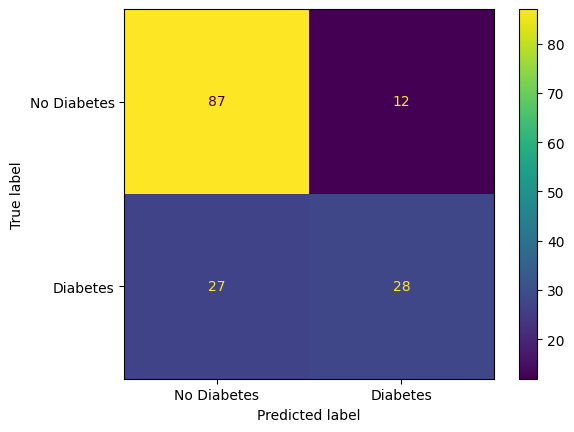

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Split the dataset into inputs and outputs
inputs = data.iloc[:, :-1].values
outputs = data.iloc[:, -1].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Seed random numbers to make the calculation deterministic (just for reproducibility)
np.random.seed(1)

# Initialize weights with random values
input_layer_neurons = X_train.shape[1]  # Number of features in input data
hidden_layer_neurons = 4  # Number of hidden layer neurons
output_neurons = 1  # Number of neurons in output layer

# Weight initialization
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

# Learning rate
lr = 0.1

# Training the neural network
epochs = 100
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_activation = np.dot(X_train, hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output, output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)

    # Compute the error (loss)
    error = y_train - predicted_output
    loss = np.mean(np.square(error)) / 2  # Mean Squared Error

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Gradients
    gradient_output_weights = hidden_layer_output.T.dot(d_predicted_output)
    gradient_output_bias = np.sum(d_predicted_output, axis=0, keepdims=True)
    gradient_hidden_weights = X_train.T.dot(d_hidden_layer)
    gradient_hidden_bias = np.sum(d_hidden_layer, axis=0, keepdims=True)

    # Updating Weights and Biases
    output_weights += gradient_output_weights * lr
    output_bias += gradient_output_bias * lr
    hidden_weights += gradient_hidden_weights * lr
    hidden_bias += gradient_hidden_bias * lr

    # Print gradients and loss
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Loss: {loss:.6f}")
    print(f"Gradients (Output Weights): \n{gradient_output_weights}")
    print(f"Gradients (Output Bias): \n{gradient_output_bias}")
    print(f"Gradients (Hidden Weights): \n{gradient_hidden_weights}")
    print(f"Gradients (Hidden Bias): \n{gradient_hidden_bias}\n")

# Test the neural network
hidden_layer_activation = np.dot(X_test, hidden_weights)
hidden_layer_activation += hidden_bias
hidden_layer_output = sigmoid(hidden_layer_activation)

output_layer_activation = np.dot(hidden_layer_output, output_weights)
output_layer_activation += output_bias
predicted_output = sigmoid(output_layer_activation)

# Convert predictions to binary outcomes
predicted_output = (predicted_output > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_output == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_output)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.show()
